Missing values per column:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


C:\Users\eshan\AppData\Local\Temp\ipykernel_8012\1963142762.py:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


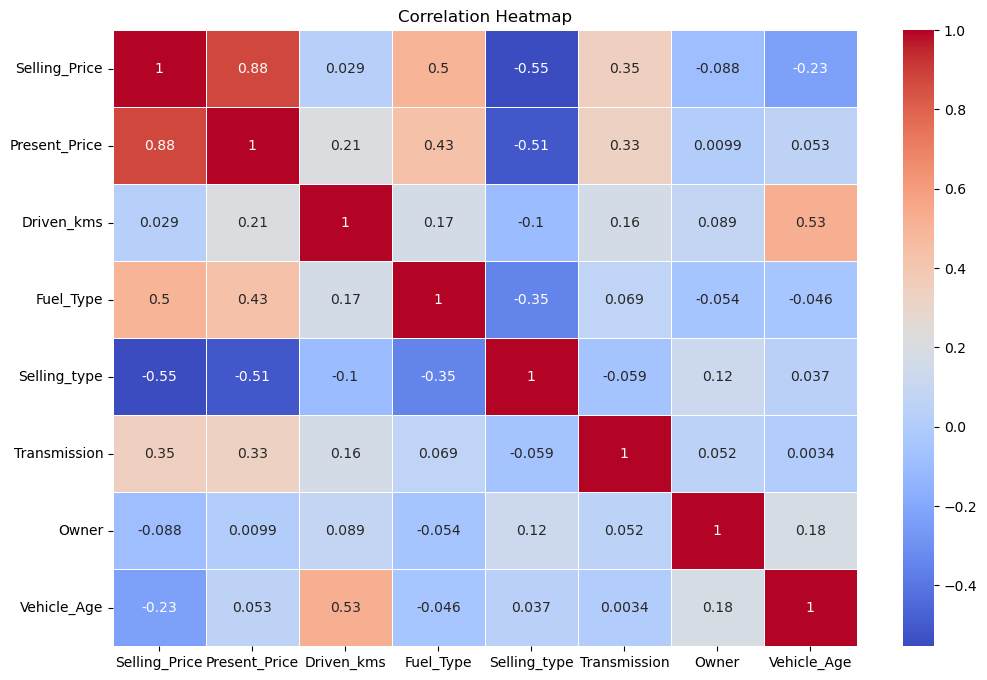

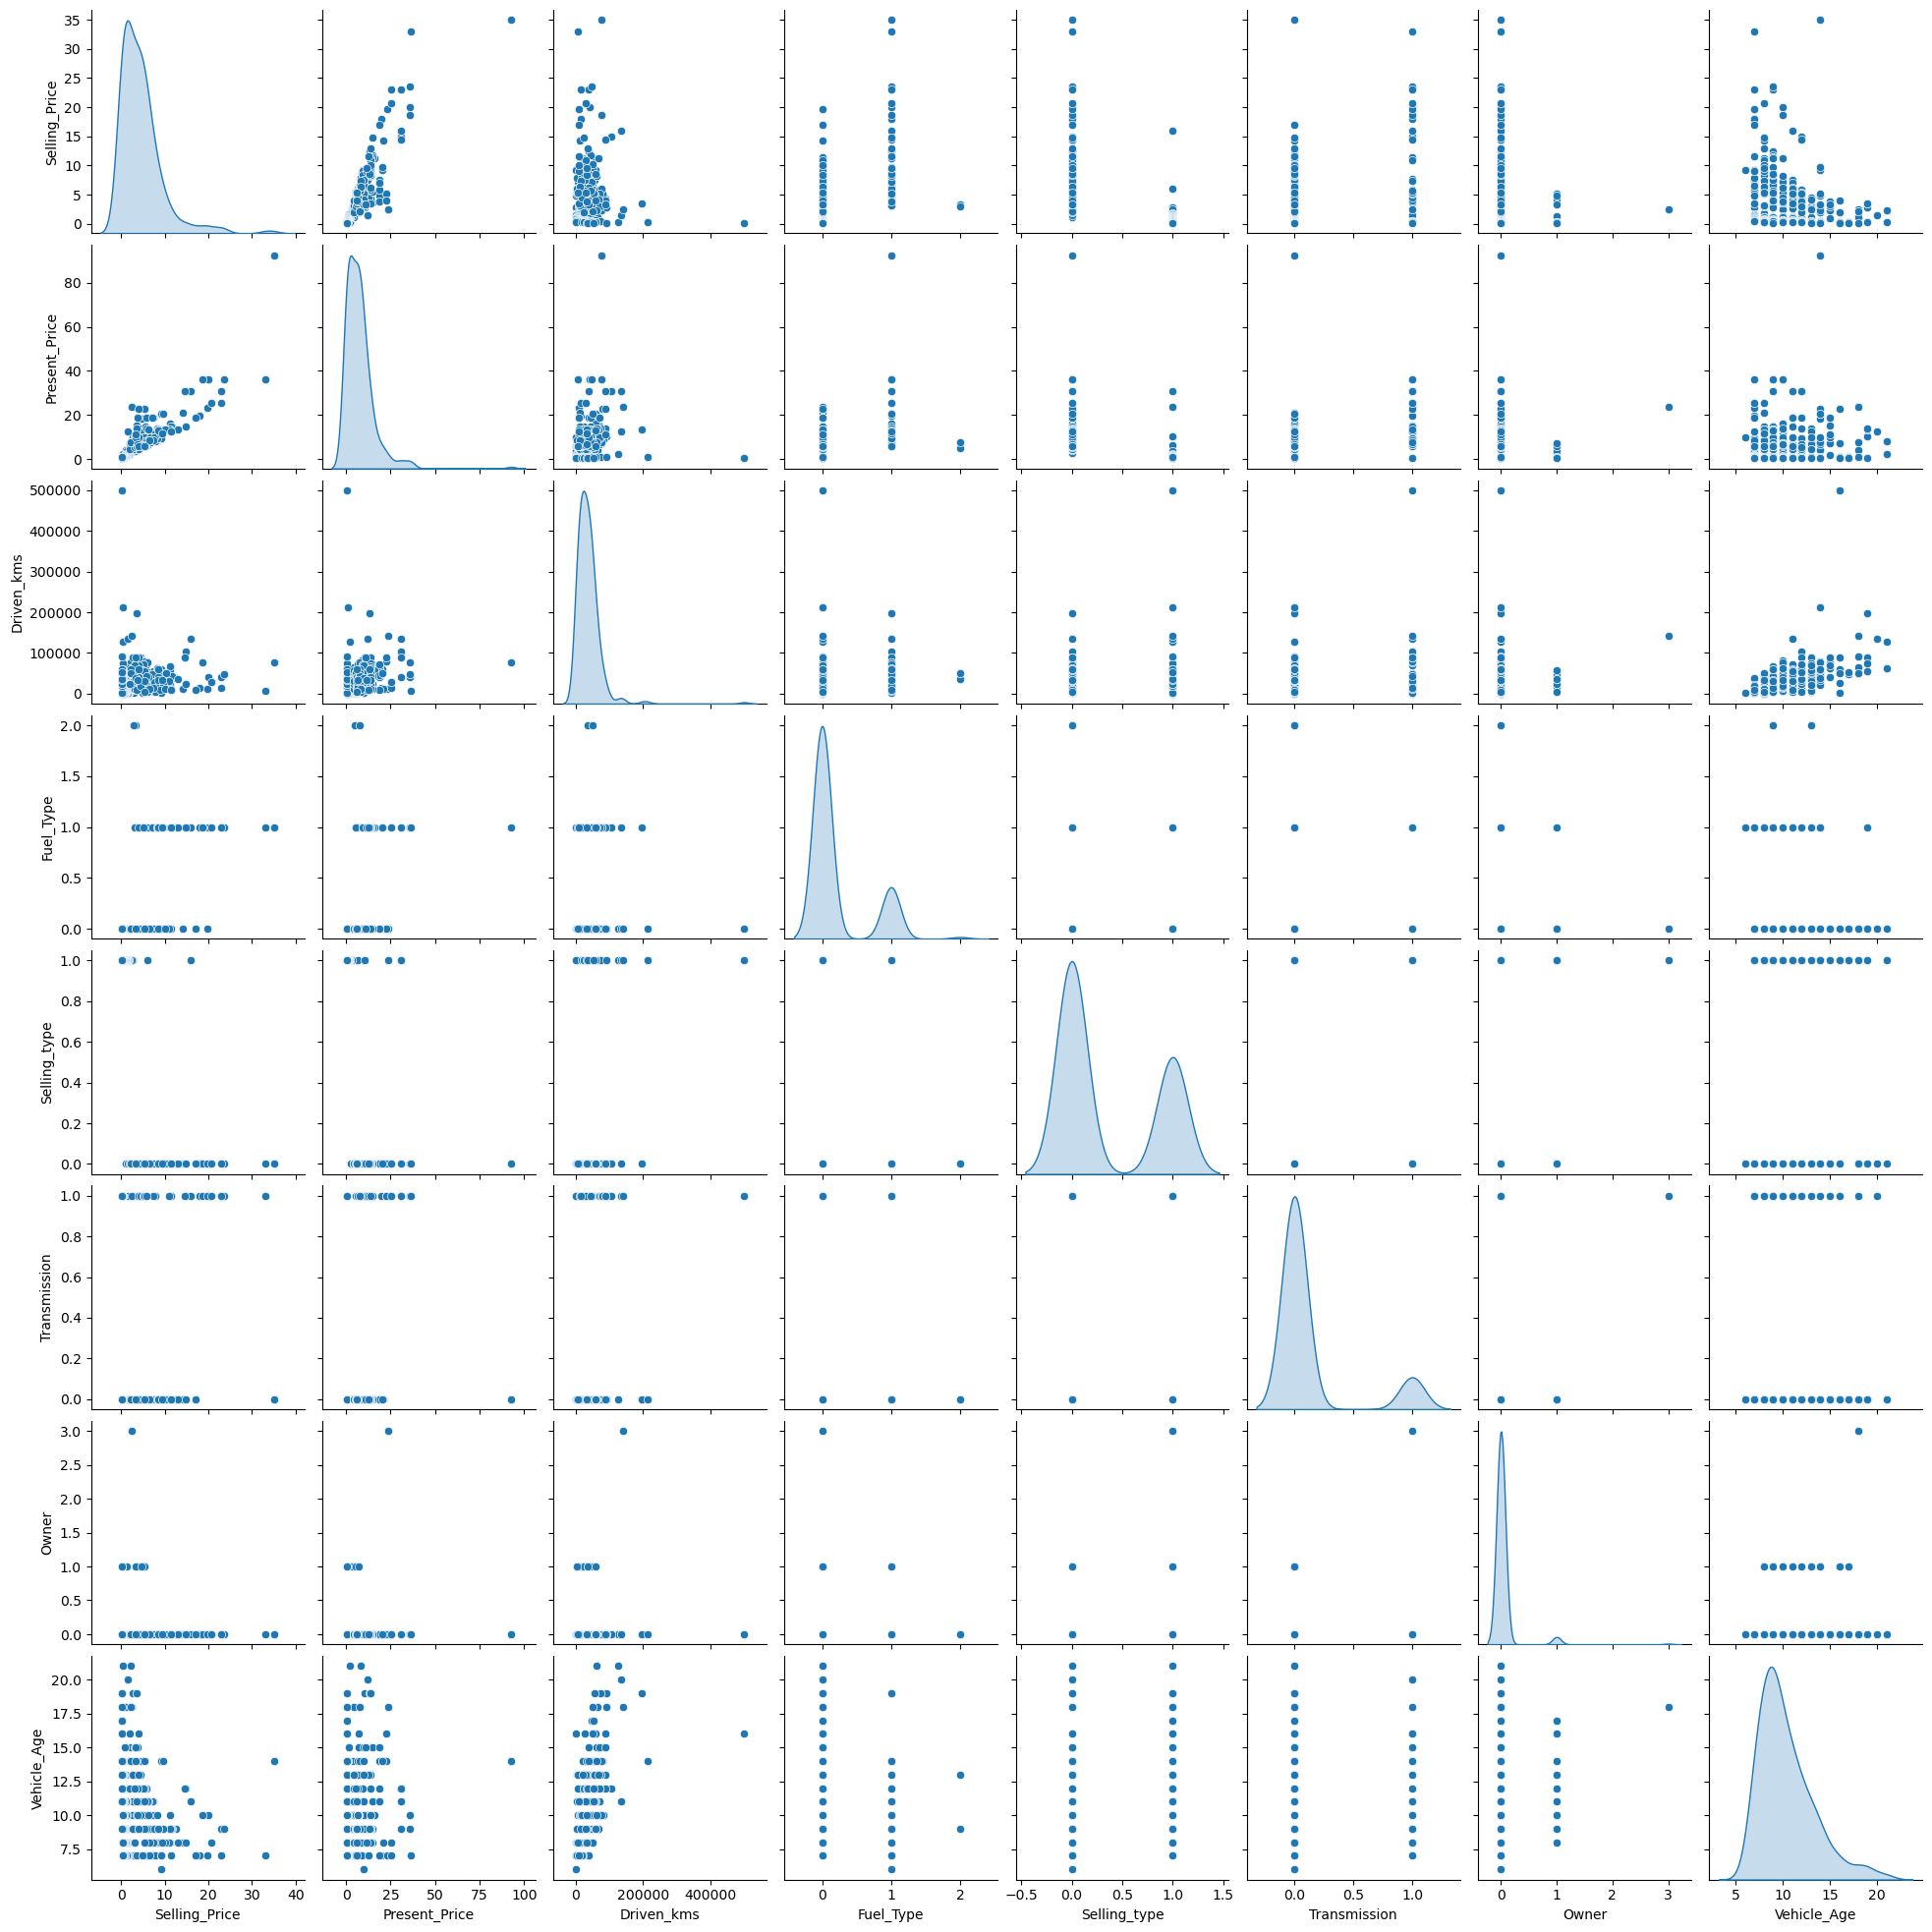

Root Mean Squared Error (RMSE): 3.47395743108634
R^2 Score: 0.5317480523441691


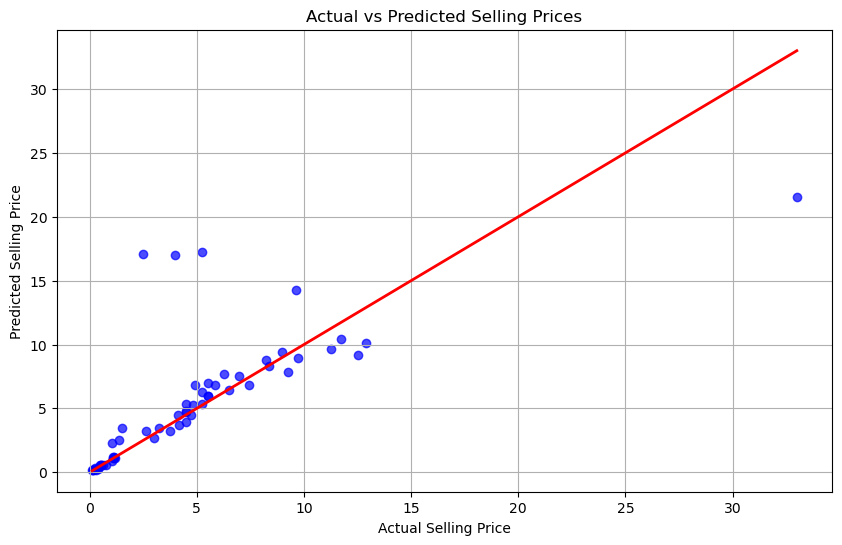

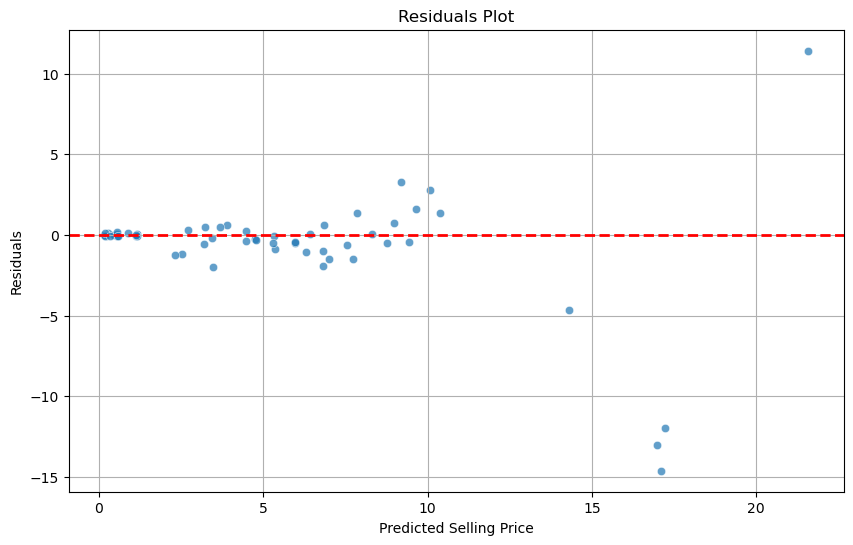

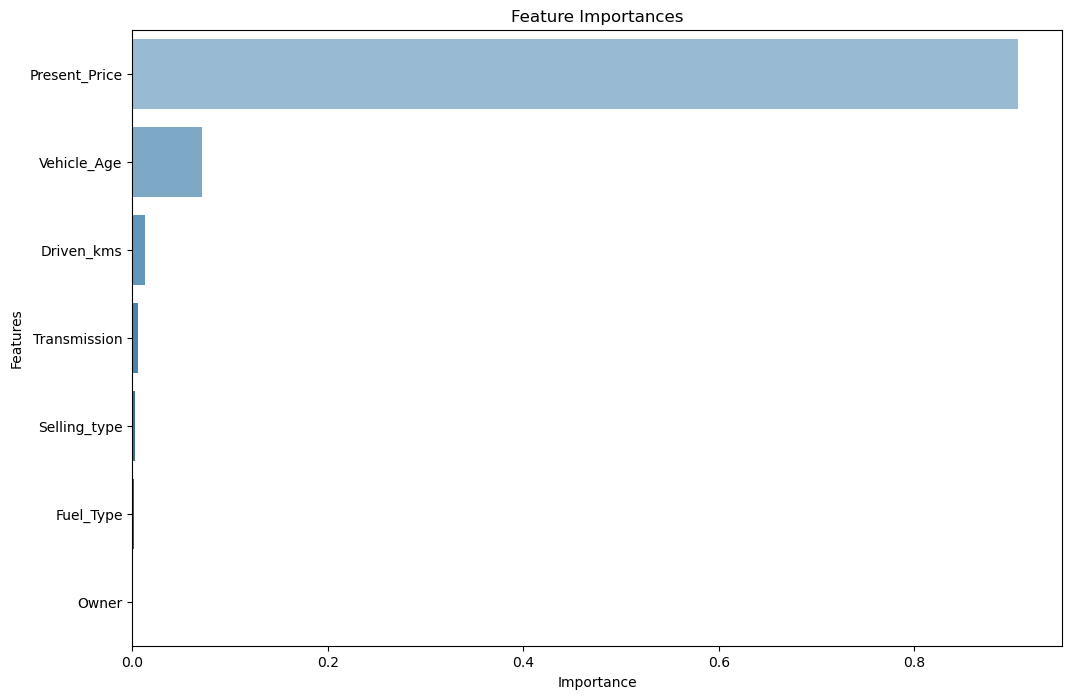


Descriptive statistics of features:
       Selling_Price  Present_Price     Driven_kms   Fuel_Type  Selling_type  \
count     299.000000     299.000000     299.000000  299.000000    299.000000   
mean        4.589632       7.541037   36916.752508    0.207358      0.354515   
std         4.984240       8.566332   39015.170352    0.422297      0.479168   
min         0.100000       0.320000     500.000000    0.000000      0.000000   
25%         0.850000       1.200000   15000.000000    0.000000      0.000000   
50%         3.510000       6.100000   32000.000000    0.000000      0.000000   
75%         6.000000       9.840000   48883.500000    0.000000      1.000000   
max        35.000000      92.600000  500000.000000    2.000000      1.000000   

       Transmission       Owner  Vehicle_Age  
count    299.000000  299.000000   299.000000  
mean       0.130435    0.043478    10.384615  
std        0.337346    0.248720     2.896868  
min        0.000000    0.000000     6.000000  
25%    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle
df = pd.read_csv("car data.csv")
print("Missing values per column:\n", df.isnull().sum())
df.drop_duplicates(inplace=True)
df['Vehicle_Age'] = 2024 - df['Year']
df.drop(['Year'], axis=1, inplace=True)
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
df['Transmission'] = df['Transmission'].map({'Manual': 0, 'Automatic': 1})
df['Selling_type'] = df['Selling_type'].map({'Dealer': 0, 'Individual': 1})
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
sns.pairplot(df, diag_kind='kde')
plt.show()
X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linewidth=2)
plt.title("Actual vs Predicted Selling Prices")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.grid(True)
plt.show()
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
sns.barplot(x=importances[indices], y=[features[i] for i in indices], palette='Blues_d')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
with open("car_price_model.pkl", 'wb') as file:
    pickle.dump(model, file)